<a href="https://colab.research.google.com/github/azavalac/SFH_dwarf_galaxies/blob/main/ProyectoModulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#instalamos artpop
!pip install artpop

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

/root/.artpop/mist. To change this location, create a MIST_PATH environment variable.


In [4]:
#BLOQUE CON LA FUNCION QUE DEVUELVE UN CSP A PARTIR DE 2 LISTAS CON EDADES Y SFR

#sfh_to_ssp: list x list -> csp
#
#
def shf_to_ssp(sfh):
  array_ssp = []

  for i in range(sfh.shape[1]):
    edad = sfh[0][i]
    sfr = sfh[1][i]
    print(edad)
    print("edad en log age: ", np.log10(edad))
    print("sfr: ", sfr)

    ssp = artpop.MISTSSP(
      log_age = np.log10(edad), # log of age in years
      num_stars = sfr,      # number of stars
      feh = -1,             # metallicity [Fe/H]
      phot_system = 'LSST', # photometric system(s)
      random_state = rng,   # random state for reproducibility
    )

    array_ssp.append(ssp)

  csp = array_ssp[0]

  for i in range(1, len(array_ssp)):
    csp = csp + array_ssp[i]

  return csp

In [ ]:
sfh_test = np.array([[1e8, 2e9, 7e9], [2e5, 1e3, 2e2]]) #edades en Gyr x SFR

shf_to_ssp(sfh_test)

3

In [ ]:
def create_csp(array_ages, array_sfr):
   csp = 0

   for i in range(len(array_ages)):
        # crear población con array_ages[i] y array_sfr[i]
        age = array_ages[i]
        sfr = array_sfr[i]
        # añadirla al conjunto de poblaciones csp
        #falta esto
   return csp

#ejemplo
ages = np.log10(np.array([1e8, 2e9, 7e9]))  # Edades en log10 años
sfr = np.array([2e5, 1e6, 2e4])
csp_result = create_csp(ages, sfr)

**SFH**

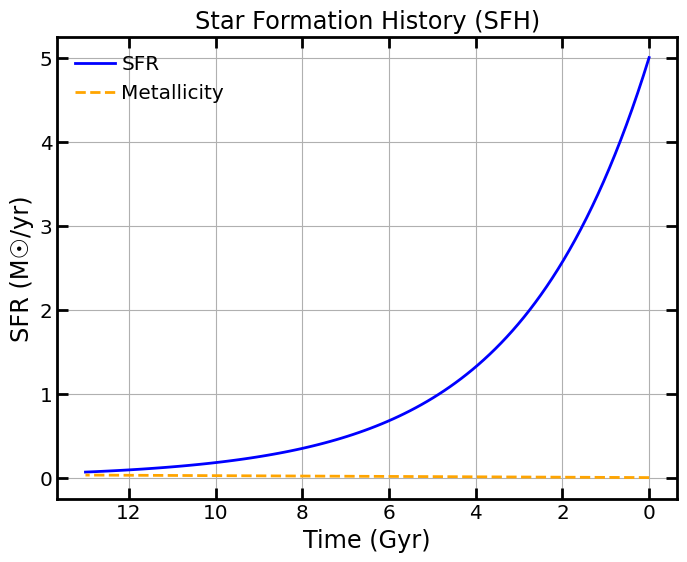

In [ ]:
import matplotlib.pyplot as plt
def plot_sfh(ages, sfr, metallicity=None, xlabel='Time (Gyr)', ylabel='SFR (M☉/yr)', title='Star Formation History (SFH)'):
    """
    Función genérica para plotear un SFH basado en una CSP (Composite Stellar Population).

    Parámetros:
    - ages: lista o arreglo de edades (en Gyr o cualquier unidad de tiempo relevante).
    - sfr: lista o arreglo de la tasa de formación estelar (SFR) correspondiente a cada edad.
    - metallicity: opcional, lista o arreglo de metalicidades correspondiente a cada edad.
    - xlabel: etiqueta del eje x (por defecto 'Time (Gyr)').
    - ylabel: etiqueta del eje y (por defecto 'SFR (M☉/yr)').
    - title: título del gráfico.
    """

    # Convertir los inputs a numpy arrays para mayor flexibilidad
    ages = np.array(ages)
    sfr = np.array(sfr)

    # Crear el plot básico
    plt.figure(figsize=(8, 6))
    plt.plot(ages, sfr, label='SFR', color='blue', lw=2)

    # Si se proporciona la metalicidad, hacer un gráfico adicional
    # Esto va de extra
    if metallicity is not None:
        metallicity = np.array(metallicity)
        plt.plot(ages, metallicity, label='Metallicity', color='orange', lw=2, linestyle='--')

    # Personalizar el gráfico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.gca().invert_xaxis()  # invierte el eje de tiempo si es necesario (para que el tiempo "avanzado" esté a la derecha)
    plt.show()

# Ejemplo de uso
ages = np.linspace(0, 13, 100)  # Edad desde 0 a 13 Gyr
sfr = np.exp(-ages/3) * 5  # Ejemplo de una SFR decreciente exponencialmente
metallicity = np.linspace(0.0001, 0.03, 100)  # Ejemplo de metalicidad creciente

plot_sfh(ages, sfr, metallicity)


In [ ]:
#SSP Y CSP DE PRUEBA

ssp_old = artpop.MISTSSP(
    log_age = 10.1,       # log of age in years
    feh = -1.5,           # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_intermediate = artpop.MISTSSP(
    log_age = 9.5,        # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_young = artpop.MISTSSP(
    log_age = 8.5,        # log of age in years
    feh = 0,              # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e4,      # number of stars
    random_state = rng,   # random state for reproducibility
)

csp = ssp_old + ssp_intermediate + ssp_young

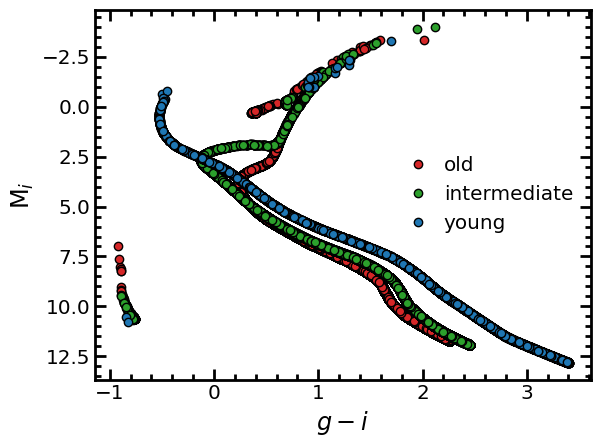

In [ ]:
i = csp.star_mags('LSST_i')
g = csp.star_mags('LSST_g')

old = csp.ssp_labels == 1
med = csp.ssp_labels == 2
young = csp.ssp_labels == 3

plt.plot(g[old] - i[old], i[old], 'o',
         c='tab:red', mec='k', label='old')
plt.plot(g[med] - i[med], i[med], 'o',
         c='tab:green', mec='k', label='intermediate')
plt.plot(g[young] - i[young], i[young], 'o',
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$');